In [8]:
import os
import tarfile
from six.moves import urllib


In [9]:
HOME = r"C:\Users\Prasanna.Gnanaraj\Documents\MachineLearning"
DOWNLOAD_ROOT = "https://raw.githubusercintent.com/ageron/jandson-ml/master/"
HOUSING_PATH = os.path.join(HOME,"datasets/housing")
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"


In [10]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path = HOUSING_PATH):
    
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractaall(path=housing_path)
    housing_tgz.close()

In [11]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [12]:
housing = load_housing_data()

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

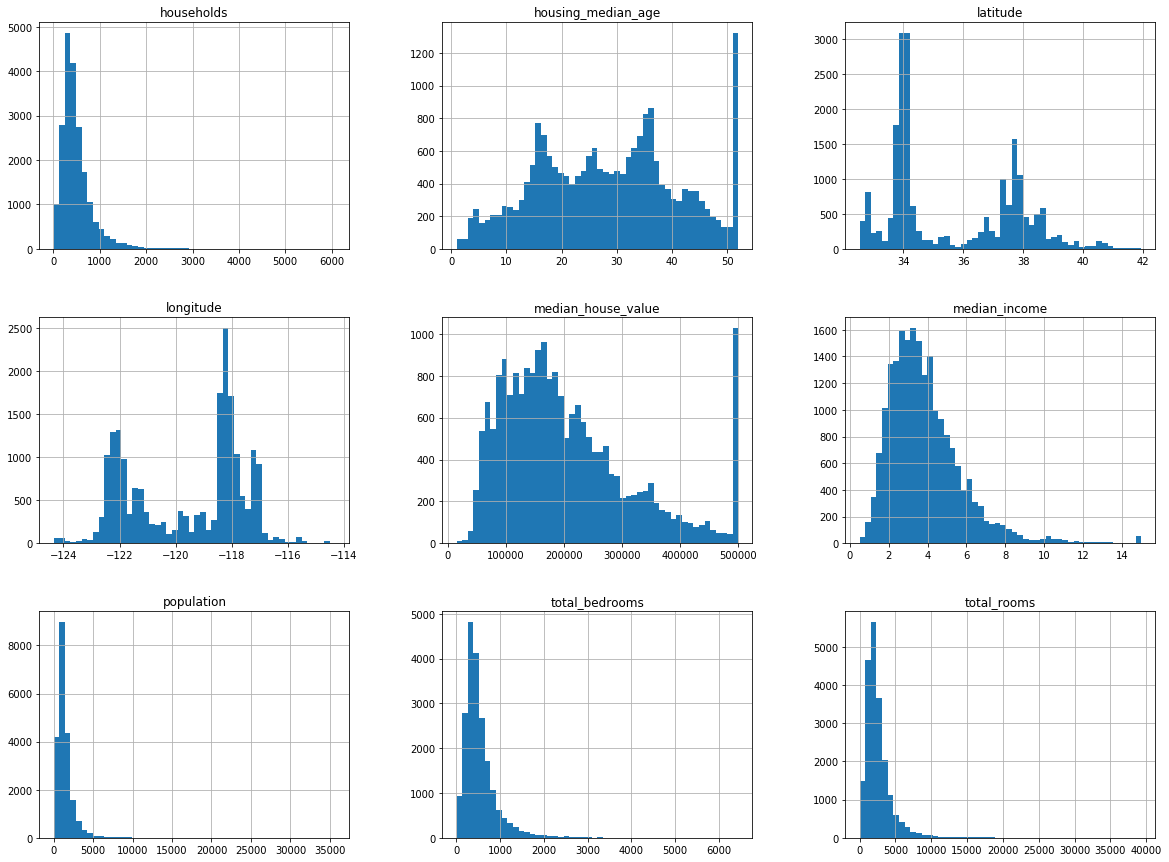

In [17]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [18]:
import numpy as np

In [19]:
def split_train_test(data,ratio):
    
    shuffeled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffeled_indices[:test_set_size]
    train_indices = shuffeled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [20]:
train_Set,test_set = split_train_test(housing,0.2)

In [21]:
print(len(train_Set),"train +",len(test_set),"test")

16512 train + 4128 test


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_set,test_set = train_test_split(housing,random_state=42,test_size=0.2)

In [24]:
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

In [25]:
housing["income_cat"].where(housing["income_cat"]>5,5.0,inplace=True)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [28]:
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [30]:
housing = strat_train_set.copy()

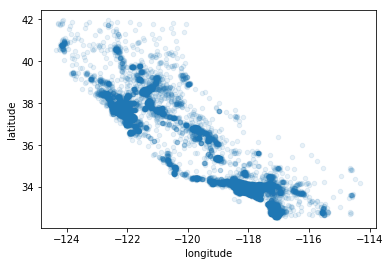

In [31]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

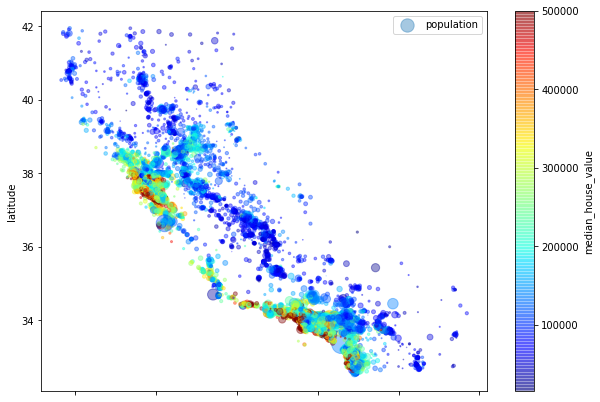

In [32]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686214
total_rooms           0.132777
housing_median_age    0.104035
households            0.065741
total_bedrooms        0.050092
population           -0.024797
longitude            -0.050312
latitude             -0.140169
Name: median_house_value, dtype: float64

In [35]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586F7A4C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000258712F4BA8>]], dtype=object)

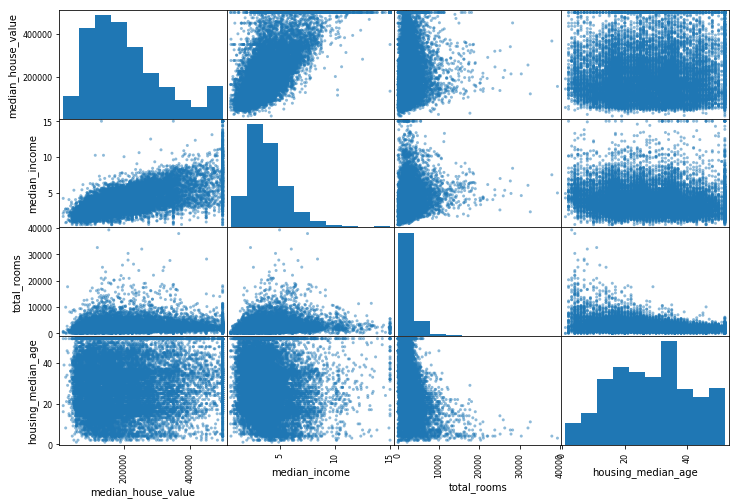

In [36]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

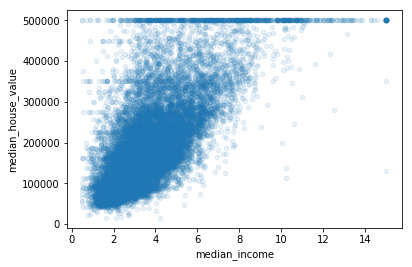

In [37]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [56]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()

In [39]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686214
total_rooms           0.132777
housing_median_age    0.104035
households            0.065741
total_bedrooms        0.050092
population           -0.024797
longitude            -0.050312
latitude             -0.140169
Name: median_house_value, dtype: float64

In [40]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [41]:
from sklearn.preprocessing import Imputer

In [42]:
imputer = Imputer(strategy="median")

In [43]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [44]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [45]:
imputer.statistics_

array([ -118.49  ,    34.255 ,    29.    ,  2125.    ,   433.5   ,
        1165.    ,   409.    ,     3.5296])

In [46]:
housing_num.median().values

array([ -118.49  ,    34.255 ,    29.    ,  2125.    ,   433.5   ,
        1165.    ,   409.    ,     3.5296])

In [47]:
X = imputer.transform(housing_num)

In [48]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 1, 0, ..., 0, 0, 1], dtype=int64)

In [50]:
print(np.transpose(housing_cat_encoded))


[4 1 0 ..., 0 0 1]


In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))


In [53]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [54]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedroom_ix,population_ix,household_ix = 3,4,5,6


In [55]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):

    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [56]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [57]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,attribute_names):
            self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [58]:
class LabelBinarizerPipelineFriendly(LabelBinarizer):
     def fit(self, X, y=None):
         """this would allow us to fit the model based on the X input."""
         super(LabelBinarizerPipelineFriendly, self).fit(X)
     def transform(self, X, y=None):
         return super(LabelBinarizerPipelineFriendly, self).transform(X)
 
     def fit_transform(self, X, y=None):
         return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)
 

In [59]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [61]:
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),('imputer',Imputer(strategy = "median")),('sttribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler())])

In [62]:
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),('label_binarizer',LabelBinarizerPipelineFriendly())])

In [63]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),('cat_pipeline',cat_pipeline)])

In [64]:
housing_prepared = full_pipeline.fit_transform(housing)

In [65]:
housing_prepared.shape

(16512, 16)

In [66]:
from sklearn.linear_model import LinearRegression

In [142]:
lin_reg = LinearRegression()

In [143]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
sample_data = housing.iloc[:5]

In [114]:
sample_labels=housing_labels.iloc[:5]

In [112]:
sample_prepared = full_pipeline.transform(sample_data)

In [115]:
print('labels',list(sample_labels))

labels [231700.0, 79800.0, 350000.0, 147200.0, 111400.0]


In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
housing_predictions = lin_reg.predict(housing_prepared)

In [120]:
lin_mse = mean_squared_error(housing_labels,housing_predictions)

In [121]:
lin_rmse = np.sqrt(lin_mse)

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
tree_reg = DecisionTreeRegressor()

In [145]:
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
housing_predictions = tree_reg.predict(housing_prepared)

In [127]:
tree_mse = mean_squared_error(housing_labels,housing_predictions)

In [128]:
tree_rmse = np.sqrt(tree_mse)

In [129]:
tree_rmse

0.0

In [146]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [132]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [147]:
display_scores(tree_rmse_scores)

Scores [ 75287.69376604  70005.84797637  72677.24221326  68215.6306162
  72192.80943346  71271.70950371  66893.42191227  67281.59545269
  68186.19917114  68900.39570078]
Mean: 70091.2545746
Standard deviation: 2572.80542575


In [148]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [149]:
display_scores(lin_rmse_scores)

Scores [ 76500.81429098  67303.19524308  71615.63063351  69931.48479511
  66762.1526088   69843.36057843  65866.8368432   70421.95959386
  64289.14603427  68620.49581086]
Mean: 69115.5076432
Standard deviation: 3265.13699207


In [80]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [152]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [153]:
display_scores(forest_rmse_scores)

Scores [ 55096.13346493  53972.96836728  54148.86564309  54040.06186111
  52011.53539373  52665.69198324  51646.02464529  51611.41831785
  49057.39419739  51959.8190236 ]
Mean: 52620.9912898
Standard deviation: 1666.79144822


In [77]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid= [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

In [82]:
forest_reg = RandomForestRegressor()

In [83]:
grid_search = GridSearchCV(forest_reg,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")

In [84]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [160]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [161]:
cvres=grid_search.cv_results_

In [165]:
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64134.0459884 {'max_features': 2, 'n_estimators': 3}
54988.5485158 {'max_features': 2, 'n_estimators': 10}
52791.1589854 {'max_features': 2, 'n_estimators': 30}
59771.0809854 {'max_features': 4, 'n_estimators': 3}
52895.3699295 {'max_features': 4, 'n_estimators': 10}
50221.6981819 {'max_features': 4, 'n_estimators': 30}
58893.6214406 {'max_features': 6, 'n_estimators': 3}
51994.1341065 {'max_features': 6, 'n_estimators': 10}
49940.0981539 {'max_features': 6, 'n_estimators': 30}
59244.4406945 {'max_features': 8, 'n_estimators': 3}
51898.5830483 {'max_features': 8, 'n_estimators': 10}
49791.3416052 {'max_features': 8, 'n_estimators': 30}
62642.1122796 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54128.285118 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59686.0204373 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53010.6459338 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57659.5192839 {'bootstrap': False, 'max_features': 4, 'n_estima

In [166]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [167]:
feature_importances

array([  6.81908099e-02,   6.73709748e-02,   4.34717270e-02,
         1.50279714e-02,   1.53630384e-02,   1.49721960e-02,
         1.36173518e-02,   3.54799344e-01,   4.70774072e-02,
         1.15537675e-01,   6.66647242e-02,   9.60783272e-03,
         1.62222319e-01,   1.14091811e-04,   2.53212047e-03,
         3.43041590e-03])

In [168]:
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)

In [169]:
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.35479934370936761, 'median_income'),
 (0.16222231930966316, 'INLAND'),
 (0.11553767527756292, 'pop_per_hhold'),
 (0.068190809887409623, 'longitude'),
 (0.067370974777379758, 'latitude'),
 (0.066664724195149502, 'bedrooms_per_room'),
 (0.04707740722503876, 'rooms_per_hhold'),
 (0.043471727027886001, 'housing_median_age'),
 (0.015363038416040864, 'total_bedrooms'),
 (0.015027971395892391, 'total_rooms'),
 (0.014972196032200123, 'population'),
 (0.013617351848920458, 'households'),
 (0.009607832715023636, '<1H OCEAN'),
 (0.0034304158967011639, 'NEAR OCEAN'),
 (0.0025321204744184552, 'NEAR BAY'),
 (0.00011409181134554923, 'ISLAND')]

In [170]:
final_model =grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [171]:
print(final_rmse)

48839.7833831


In [5]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm_reg = svm.SVR()

In [68]:

param_grid = [
        {'kernel': ['linear'], 'C': [10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [300., 1000.0],
         'gamma': [ 0.3, 1.0, 3.0]},
    ]

In [69]:
grid_search = GridSearchCV(svm_reg,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")

In [70]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [300.0, 1000.0], 'gamma': [0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [87]:
feature_importances = grid_search.best_estimator_.feature_importances_
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

In [88]:
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]


In [90]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 5))
])

In [98]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [99]:
top_k_feature_indices = indices_of_top_k(feature_importances, 5)

In [93]:
housing_prepared_top_k_features[0:3]

array([[-0.5502143 , -0.15255473, -0.87025017, -0.06102237,  0.        ],
       [-1.11427484,  2.212913  , -0.52052389, -0.05418657,  1.        ],
       [-1.19414182,  0.99263203,  5.85775702, -0.02692218,  0.        ]])

In [97]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.5502143 , -0.15255473, -0.87025017, -0.06102237,  0.        ],
       [-1.11427484,  2.212913  , -0.52052389, -0.05418657,  1.        ],
       [-1.19414182,  0.99263203,  5.85775702, -0.02692218,  0.        ]])

array([ 0,  1,  7,  9, 12], dtype=int64)